In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

# setting color palette
# pal = sns.color_palette('Paired')
# sns.set_palette(pal)
# sns.palplot(pal)

In [2]:
import sys
sys.path.append('/public/home/mowp/workspace/mowp_scripts/pipelines/BS_seq_pipeline/script')

In [3]:
%load_ext autoreload
%autoreload 1
%aimport metaplot_bs_seq

In [4]:
# load gene_list

%store -r output_res
all_gene = set(output_res['gene_id'])

# Example

## site-point

In [5]:
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.cg.bw'
bins = 50
b1 = 1000
a1 = 1000
tts_cov = metaplot_bs_seq.get_meta_site_result(infile, all_gene, 'aTSS', bins=bins, before=b1, after=a1)

b2 = 1000
a2 = 1000
pas_cov = metaplot_bs_seq.get_meta_site_result(infile, all_gene, 'PAS', bins=bins, before=b2, after=a2)

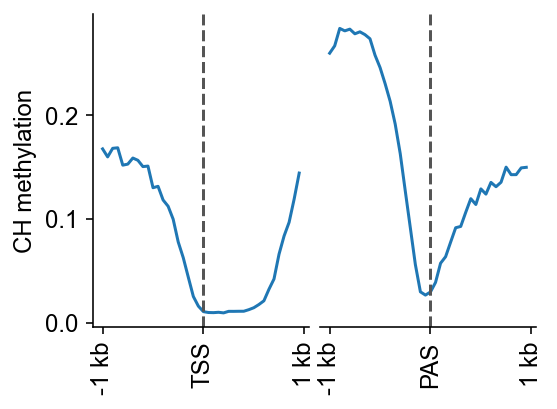

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(4, 3), sharey=True)
ax[0].plot(tts_cov)
ax[1].plot(pas_cov)

metaplot_bs_seq.set_ax(ax, b1, a1, b2, a2, bins, ylabel='CH methylation')

plt.tight_layout()
plt.subplots_adjust(wspace=.05);

## reference-scale

In [7]:
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.cg.bw'
bins = 100
b = 2000
a = 2000
m = 2000
cov = metaplot_bs_seq.get_meta_scale_result(infile, all_gene, 'aTSS', 'PAS', bins=bins, before=b, after=a, regionbody=m)

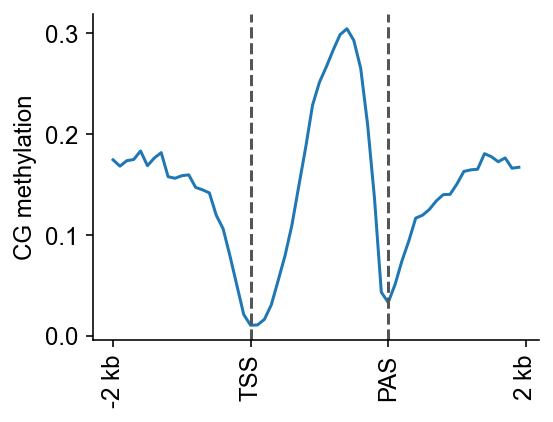

In [8]:
plt.figure(figsize=(4, 3))
plt.plot(cov)

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'TSS', 'PAS', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('CG methylation')

sns.despine(top=True, right=True)

# Average distribution of methylation levels over genes and TEs

## Gene region

In [13]:
bins = 100
b = 2000
a = 2000
m = 2000

# CG
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.cg.bw'
cg_cov = metaplot_bs_seq.get_meta_scale_result(infile, all_gene, 'aTSS', 'aTES', bins=bins, before=b, after=a, regionbody=m)

# CHG
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.chg.bw'
chg_cov = metaplot_bs_seq.get_meta_scale_result(infile, all_gene, 'aTSS', 'aTES', bins=bins, before=b, after=a, regionbody=m)

# CHH
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.chh.bw'
chh_cov = metaplot_bs_seq.get_meta_scale_result(infile, all_gene, 'aTSS', 'aTES', bins=bins, before=b, after=a, regionbody=m)

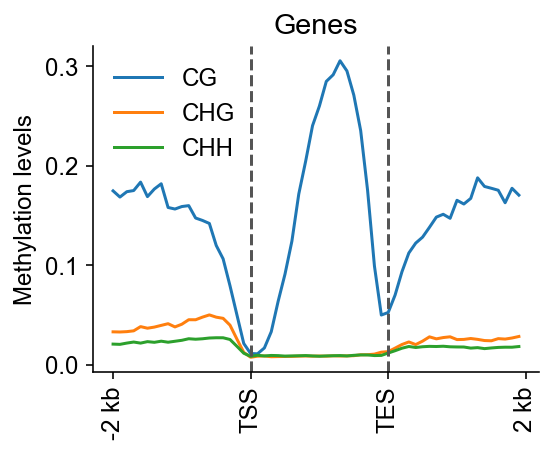

In [15]:
plt.figure(figsize=(4, 3))
plt.plot(cg_cov, label='CG')
plt.plot(chg_cov, label='CHG')
plt.plot(chh_cov, label='CHH')

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'TSS', 'TES', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('Methylation levels')
plt.legend(frameon=False)
plt.title('Genes')

sns.despine(top=True, right=True)

## TE region

In [26]:
import pyranges as pr
gene_model_bed = '/public/home/mowp/db/Arabidopsis_thaliana/isoform/araport11.gene.bed'
gene_model = pr.read_bed(gene_model_bed, as_df=True)
gene_model.eval('length = End-Start', inplace=True)

In [56]:
long_gene = set(gene_model.query('length > 2000')['Name'])

In [16]:
import pandas as pd
infile = '/public/home/mowp/db/Arabidopsis_thaliana/bed/Araport11_gene_type'
gene_type = pd.read_csv(infile, sep='\t', skiprows=3)

In [57]:
te_gene = set(gene_type.query('gene_model_type == "transposable_element_gene"')['#name']) & long_gene

In [58]:
bins = 100
b = 4000
a = 4000
m = 4000

# CG
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.cg.bw'
cg_cov = metaplot_bs_seq.get_meta_scale_result(infile, te_gene, 'aTSS', 'aTES', bins=bins, before=b, after=a, regionbody=m)

# CHG
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.chg.bw'
chg_cov = metaplot_bs_seq.get_meta_scale_result(infile, te_gene, 'aTSS', 'aTES', bins=bins, before=b, after=a, regionbody=m)

# CHH
infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.chh.bw'
chh_cov = metaplot_bs_seq.get_meta_scale_result(infile, te_gene, 'aTSS', 'aTES', bins=bins, before=b, after=a, regionbody=m)

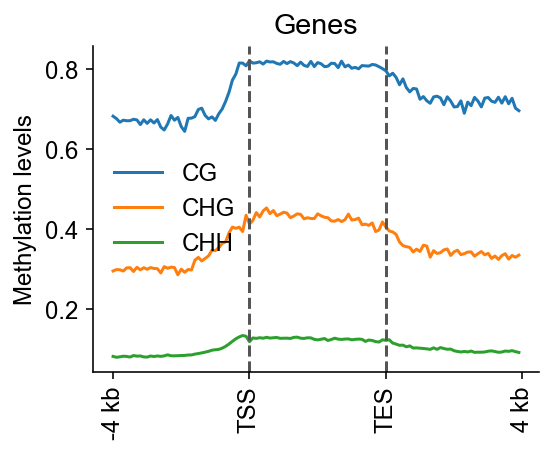

In [59]:
plt.figure(figsize=(4, 3))
plt.plot(cg_cov, label='CG')
plt.plot(chg_cov, label='CHG')
plt.plot(chh_cov, label='CHH')

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'TSS', 'TES', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('Methylation levels')
plt.legend(frameon=False)
plt.title('Genes')

sns.despine(top=True, right=True)